In [26]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots 
import seaborn as sns # Graphs
import plotly.express as px
from scipy.stats import pearsonr #correlation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING & READING OF THE DATASET

In [28]:
#to read the first 5 rows
Energy = pd.read_csv("energydata.csv")
Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#to read the first 5 rows
Energy = pd.read_csv("energydata.csv")
Energy.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [4]:
#The aim of this reseaarch is to to deploy machine learning techniques in the optimization of energy efficiency in buildings
#The dataset is an energy prediction dataset for appliances, can be used to forecast a house's overall energy use in kWh
#The data contains 29 attributes and 19735 records, 
#The code below shows the features for my data set
for E in Energy.columns:
    print(E)
    

date
Appliances
lights
T1
RH_1
T2
RH_2
T3
RH_3
T4
RH_4
T5
RH_5
T6
RH_6
T7
RH_7
T8
RH_8
T9
RH_9
T_out
Press_mm_hg
RH_out
Windspeed
Visibility
Tdewpoint
rv1
rv2


In [5]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### DATA DICTIONARY FOR MY DATASET
Light - Light energy consumption

T1 - kitchen area temperature,

RH_1 - kitchen area humidity,

T2 - Living room area temperature, measured Celsius float64

RH_2 - Living room area humidity,

T3 - Laundry room area temperature,

RH_3 Laundry room area humidity, measured % float64

T4 Office room Temperature, measured Celsius float64

RH_4 Office room humidity, measured % float64

T5 Bathroom temperature, measured Celsius float64

RH_5 Humidity in bathroom, measured % float64

T6 Temperature outside the building (north side), measured Celsius float64

RH_6 Humidity outside the building (north side), measured % float64

T7 Ironing room Temperature, measured Celsius float64

RH_7 Ironing room Humidity, measured % float64

T8 Teenager room 2 temperature, measured Celsius float64

RH_8 Teenager room 2 humidity, measured % float64

T9 Parents’ room temperature, measured Celsius float64

RH_9 Parents’ room umidity, measured % float64

T_out Temperature outside (from Chièvres weather station), measured Celsius float64

Pressure from Chièvres weather station, measured mm Hg float64

RH_out, Humidity outside (from Chièvres weather station), measured % float64

Windspeed From Chièvres weather station, measured m/s float64

Visibility from Chièvres weather station, measured km float64

Tdewpoint From Chièvres weather station, measured °C float64

rv1, Random variable 1, nondimensional float64

rv2, Random variable 2, nondimensional float64

Date time stamp datetime64

### DATA CLEANUP

In [6]:
#check for the array dimensions
Energy.shape

(19735, 29)

In [7]:
# To check for missing values
Energy.isnull()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
Energy.isnull().sum()

Name               0
Train_Time         0
Train_R2_Score     0
Test_R2_Score      0
Test_RMSE_Score    0
Test_MAE_Score     0
dtype: int64

In [9]:
#Check numbers of duplicated rows 
dup_Energy = Energy[Energy.duplicated()]
print(dup_Energy.shape)

(0, 29)


In [29]:
#To rename the temperature columns i.e The T1, T2, T3, T4, T5, T6, T7,T8, T9 and T_out
Temperature = {
    'T1' : 'kitchen_temp', 'T2' : 'living_temp', 'T3' : 'laundry_temp', 
    'T4' : 'office_temp', 'T5' : 'bath_temp', 'T6' : 'outside_temp',
    'T7' : 'ironing_temp', 'T8' : 'teen_temp', 'T9' : 'parents_temp', 'T_out' : 'station_temp'
  }
Energy = Energy.rename(columns=Temperature)


In [11]:
#to check if implemented
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          19735 non-null  object 
 1   Appliances    19735 non-null  int64  
 2   lights        19735 non-null  int64  
 3   kitchen_temp  19735 non-null  float64
 4   RH_1          19735 non-null  float64
 5   living_temp   19735 non-null  float64
 6   RH_2          19735 non-null  float64
 7   laundry_temp  19735 non-null  float64
 8   RH_3          19735 non-null  float64
 9   office_temp   19735 non-null  float64
 10  RH_4          19735 non-null  float64
 11  bath_temp     19735 non-null  float64
 12  RH_5          19735 non-null  float64
 13  outside_temp  19735 non-null  float64
 14  RH_6          19735 non-null  float64
 15  ironing_temp  19735 non-null  float64
 16  RH_7          19735 non-null  float64
 17  teen_temp     19735 non-null  float64
 18  RH_8          19735 non-nu

In [30]:
#To rename the Humidity columns i.e The RH_1, RH_2, RH_3, RH_4, RH_5, RH_6, RH_7, RH_8, RH_9 and RH_out
Humidity = {
    'RH_1' : 'kitchen_humid', 'RH_2' : 'living_humid', 'RH_3' : 'laundry_humid', 
    'RH_4' : 'office_humid', 'RH_5' : 'bath_humid', 'RH_6' : 'outside_humid',
    'RH_7' : 'ironing_humid', 'RH_8' : 'teen_humid', 'RH_9' : 'parents_humid', 'RH_out' : 'station_humid'
}
Energy = Energy.rename(columns=Humidity) 

In [13]:
#to check if implemented
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   Appliances     19735 non-null  int64  
 2   lights         19735 non-null  int64  
 3   kitchen_temp   19735 non-null  float64
 4   kitchen_humid  19735 non-null  float64
 5   living_temp    19735 non-null  float64
 6   living_humid   19735 non-null  float64
 7   laundry_temp   19735 non-null  float64
 8   laundry_humid  19735 non-null  float64
 9   office_temp    19735 non-null  float64
 10  office_humid   19735 non-null  float64
 11  bath_temp      19735 non-null  float64
 12  bath_humid     19735 non-null  float64
 13  outside_temp   19735 non-null  float64
 14  outside_humid  19735 non-null  float64
 15  ironing_temp   19735 non-null  float64
 16  ironing_humid  19735 non-null  float64
 17  teen_temp      19735 non-null  float64
 18  teen_h

### DESCRIPTIVE STATISTIC


In [14]:
#Describing the dataset
Energy.describe()

,Appliances,lights,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,...,parents_temp,parents_humid,station_temp,Press_mm_hg,station_humid,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [15]:
#to generate descriptive statistics for the Temperature columns only toi make it readable
Temperature_columns = [col for col in Energy.columns if "temp" in col]
temperature_stats = Energy[Temperature_columns].describe().T

Energy[Temperature_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
kitchen_temp,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
living_temp,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
laundry_temp,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
office_temp,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
bath_temp,19735.0,19.592106,1.844623,15.330000,18.277500,19.390000,20.619643,25.795000
outside_temp,19735.0,7.910939,6.090347,-6.065000,3.626667,7.300000,11.256000,28.290000
ironing_temp,19735.0,20.267106,2.109993,15.390000,18.700000,20.033333,21.600000,26.000000
teen_temp,19735.0,22.029107,1.956162,16.306667,20.790000,22.100000,23.390000,27.230000
parents_temp,19735.0,19.485828,2.014712,14.890000,18.000000,19.390000,20.600000,24.500000
station_temp,19735.0,7.411665,5.317409,-5.000000,3.666667,6.916667,10.408333,26.100000


#### OBSERVATIONS :
Average outside temperature over a period of 4.5 months is around 7.5 degrees. It ranges from -6 - 28 degrees While average temperature inside the building has been around 20 degrees for all the rooms. It ranges from 14 - 30 degrees Which implies, Warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation between temperature and consumption of energy inside house

In [16]:
#to generate descriptive statistics for the Humidity columns to make it readable
Humidity_columns = [col for col in Energy.columns if "humid" in col]
humidity_stats = Energy[Humidity_columns].describe().T

Energy[Humidity_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
kitchen_humid,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
living_humid,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
laundry_humid,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
office_humid,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000
bath_humid,19735.0,50.949283,9.022034,29.815000,45.400000,49.090000,53.663333,96.321667
outside_humid,19735.0,54.609083,31.149806,1.000000,30.025000,55.290000,83.226667,99.900000
ironing_humid,19735.0,35.388200,5.114208,23.200000,31.500000,34.863333,39.000000,51.400000
teen_humid,19735.0,42.936165,5.224361,29.600000,39.066667,42.375000,46.536000,58.780000
parents_humid,19735.0,41.552401,4.151497,29.166667,38.500000,40.900000,44.338095,53.326667
station_humid,19735.0,79.750418,14.901088,24.000000,70.333333,83.666667,91.666667,100.000000


### OBSERVATIONS :
Average humidity outside the building has been higher than the average humidity inside. Average humidity at the weather station is significantly higher compared to outside humidity near the building. Average humidity in the bathroom is significantly higher compared to other rooms due to obvious reasons. Kids and parent room show a comparatively higher average humidity as well signifying the fact that, inhabitants of this building spend most of their time in these buildings

In [17]:
#to generate descriptive statistics for the remaining columns
remaining_columns = [col for col in Energy.columns if col not in Humidity_columns and col not in Temperature_columns]
remaining_stats = Energy[remaining_columns].describe().T

Energy[remaining_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.00000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.00000
Press_mm_hg,19735.0,755.522602,7.399441,729.300000,750.933333,756.100000,760.933333,772.30000
Windspeed,19735.0,4.039752,2.451221,0.000000,2.000000,3.666667,5.500000,14.00000
Visibility,19735.0,38.330834,11.794719,1.000000,29.000000,40.000000,40.000000,66.00000
Tdewpoint,19735.0,3.760707,4.194648,-6.600000,0.900000,3.433333,6.566667,15.50000
rv1,19735.0,24.988033,14.496634,0.005322,12.497889,24.897653,37.583769,49.99653
rv2,19735.0,24.988033,14.496634,0.005322,12.497889,24.897653,37.583769,49.99653


#### Observation:
75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there might be outliers in this column and there are small number of cases where consumption is very high The first, second and third quartiles are 0 for the lights column, which means that most of the information of this column is 0. As we can see below more than 77% of the registers in this column is 0 and so, not relevant for the prediction.

In [18]:
Energy.lights.value_counts()


0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

In [31]:
T=Energy[['Appliances']]
Q1 = T.quantile(0.25)
Q3 = T.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

EnergyOutlier=T.describe()
outlierSet=set()
for column in EnergyOutlier.columns:
    Q1 = EnergyOutlier[column]['25%']
    Q3 = EnergyOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((T[column] < (Q1 - 1.5 * IQR)) |(T[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        

Energy.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


### DATA VISUALIZATION

<Axes: >

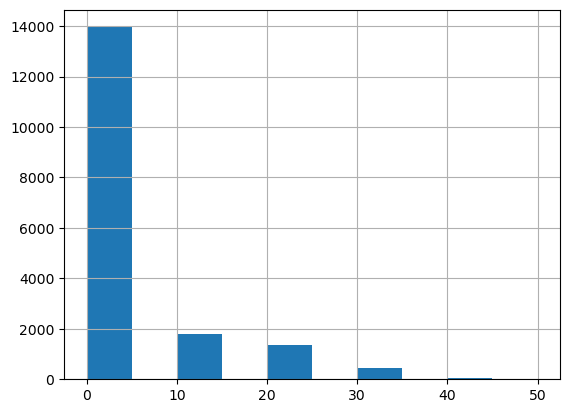

In [20]:
#from the distribution the applianecs and light features seems not to be well distributed

Energy.lights.hist(bins=10)
#it can be seen that most of the values are 0 i.e 0 has 15252 instances out of the total
#As maximum value in lights attribute is 0, it wont be playing much role in this model.
#Hence lights attribute wil be dropped from the dataset.

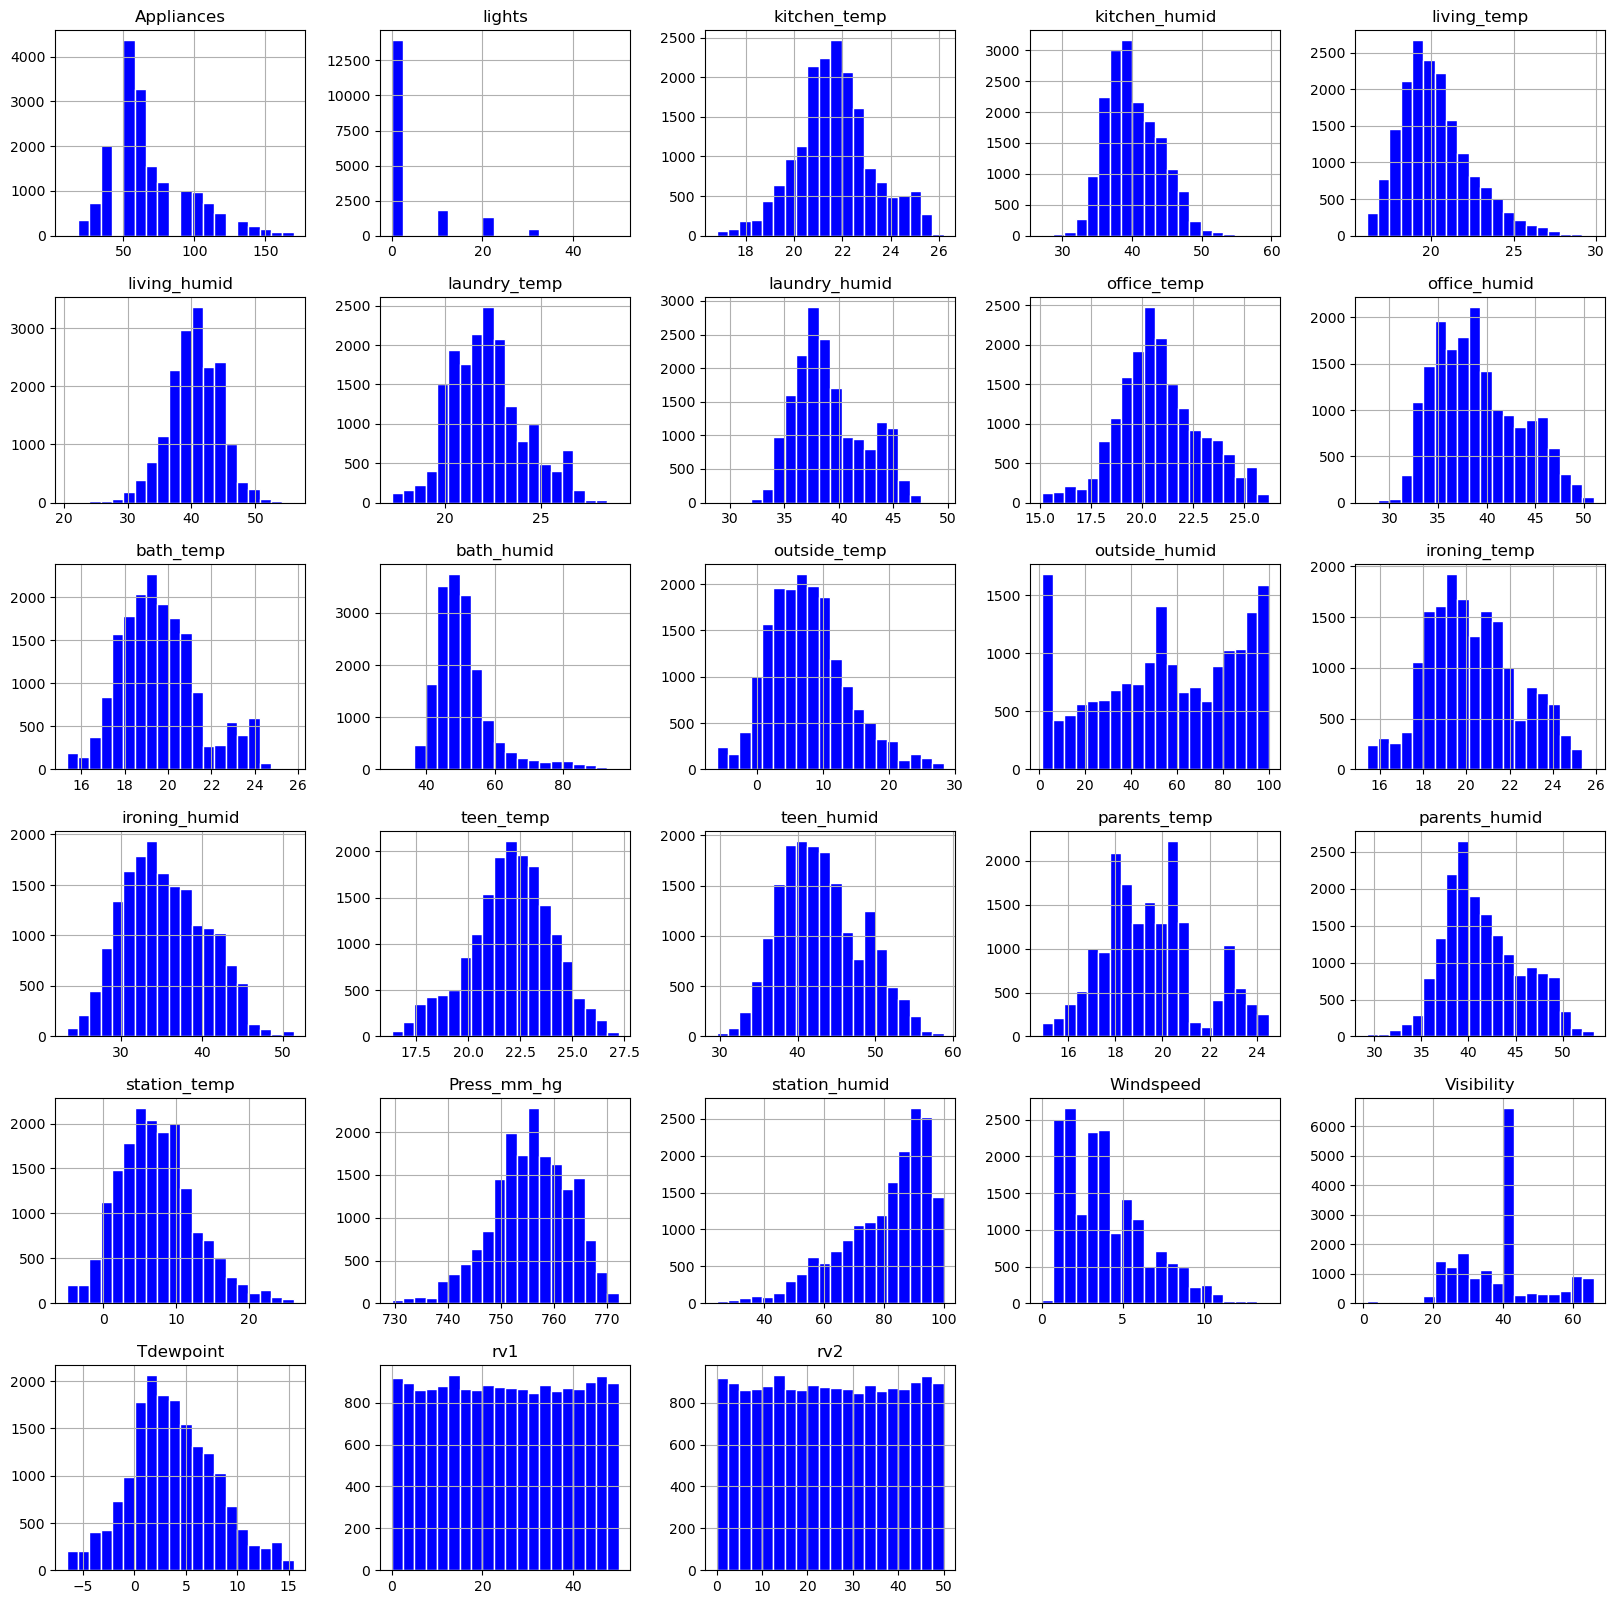

In [21]:
#To Visualise using Histogram
Energy.hist(bins = 20, figsize = (20, 20), color = 'blue', edgecolor = 'white');

<Axes: xlabel='Appliances', ylabel='Count'>

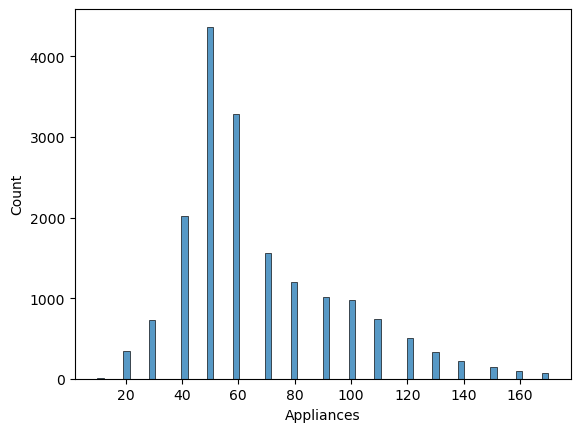

In [22]:
Energy.Appliances.value_counts()
#Target varaible distribution
sns.histplot(Energy['Appliances'])
#TO count the values for each Appliances used

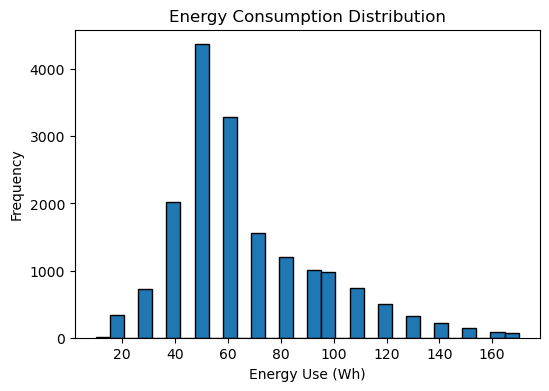

In [23]:
#Energy Consumption Distribution: Visualize the distribution of energy use in Wh Appliances
#to understand its spread and identify any potential outliers
plt.figure(figsize=(6, 4))
plt.hist(Energy['Appliances'], bins=30, edgecolor='k')
plt.xlabel('Energy Use (Wh)')
plt.ylabel('Frequency')
plt.title('Energy Consumption Distribution')
plt.show()

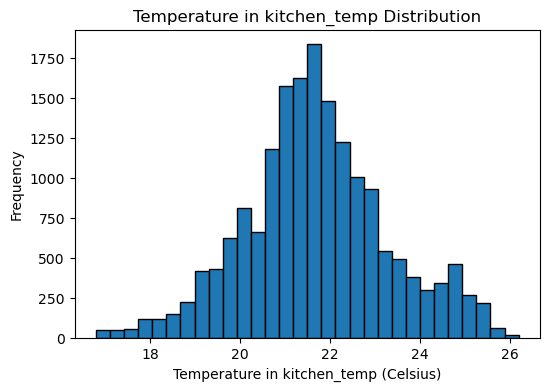

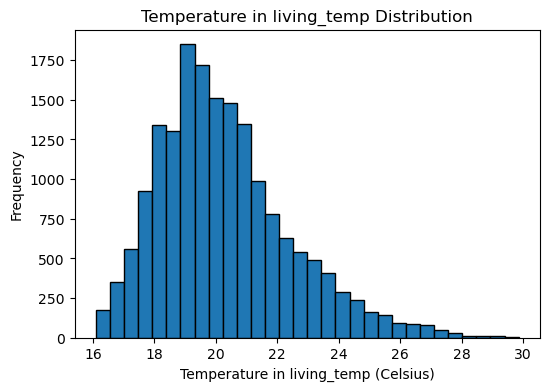

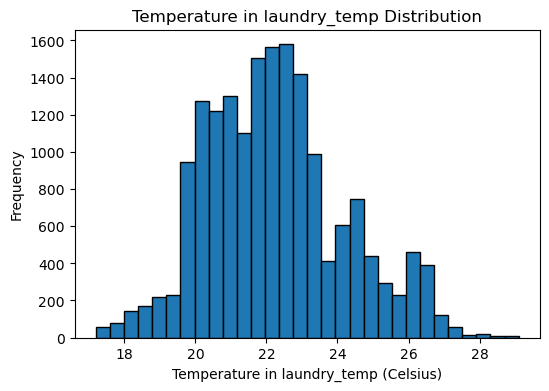

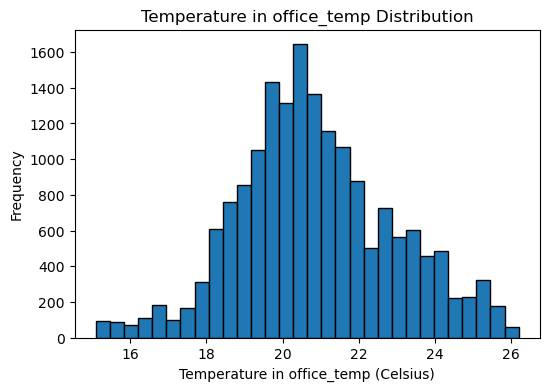

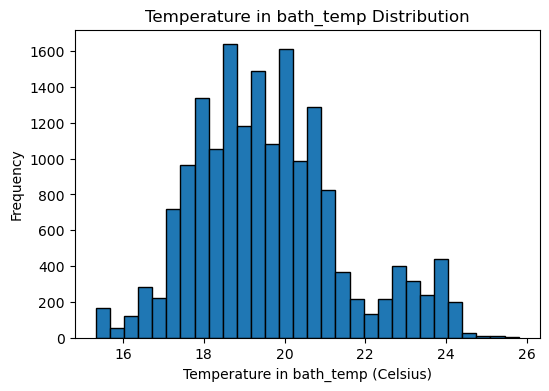

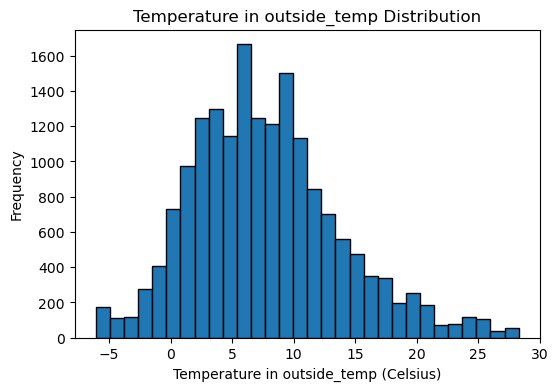

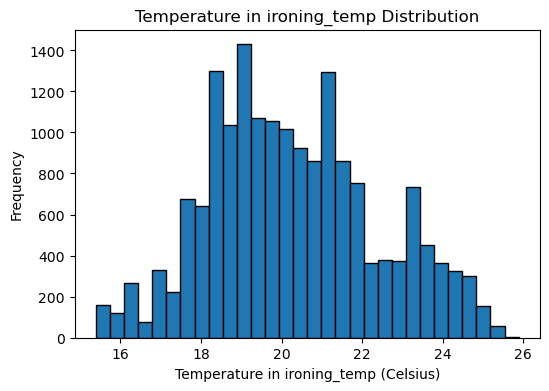

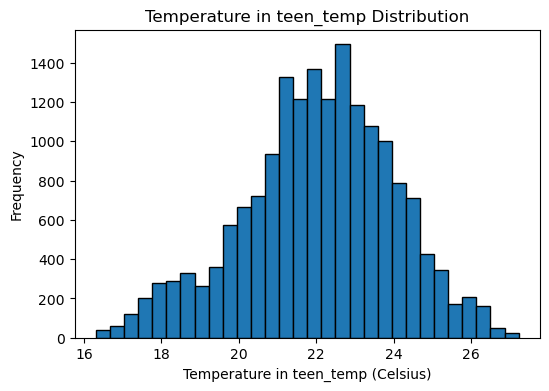

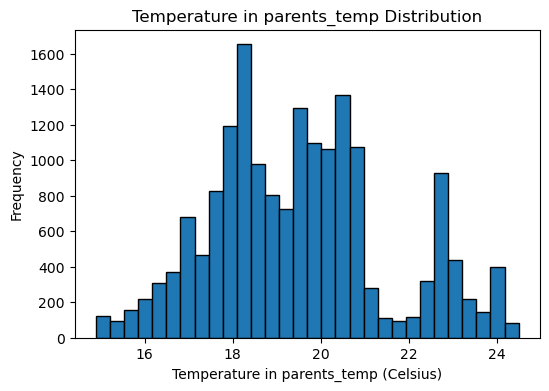

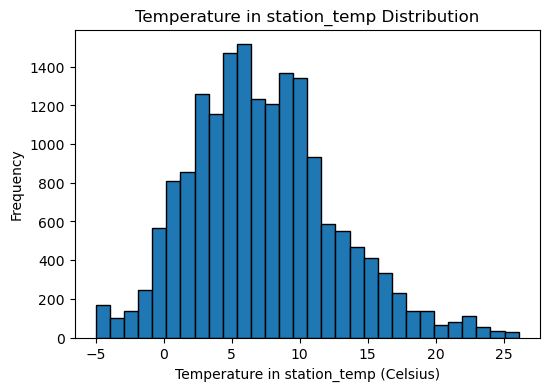

In [24]:
# to check for Temperature Distributions using histogram
temperature_columns = ['kitchen_temp','living_temp', 'laundry_temp','office_temp','bath_temp', 'outside_temp','ironing_temp','teen_temp','parents_temp', 'station_temp']
for col in temperature_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(Energy[col], bins=30, edgecolor='k')
    plt.xlabel(f'Temperature in {col} (Celsius)')
    plt.ylabel('Frequency')
    plt.title(f'Temperature in {col} Distribution')
    plt.show()

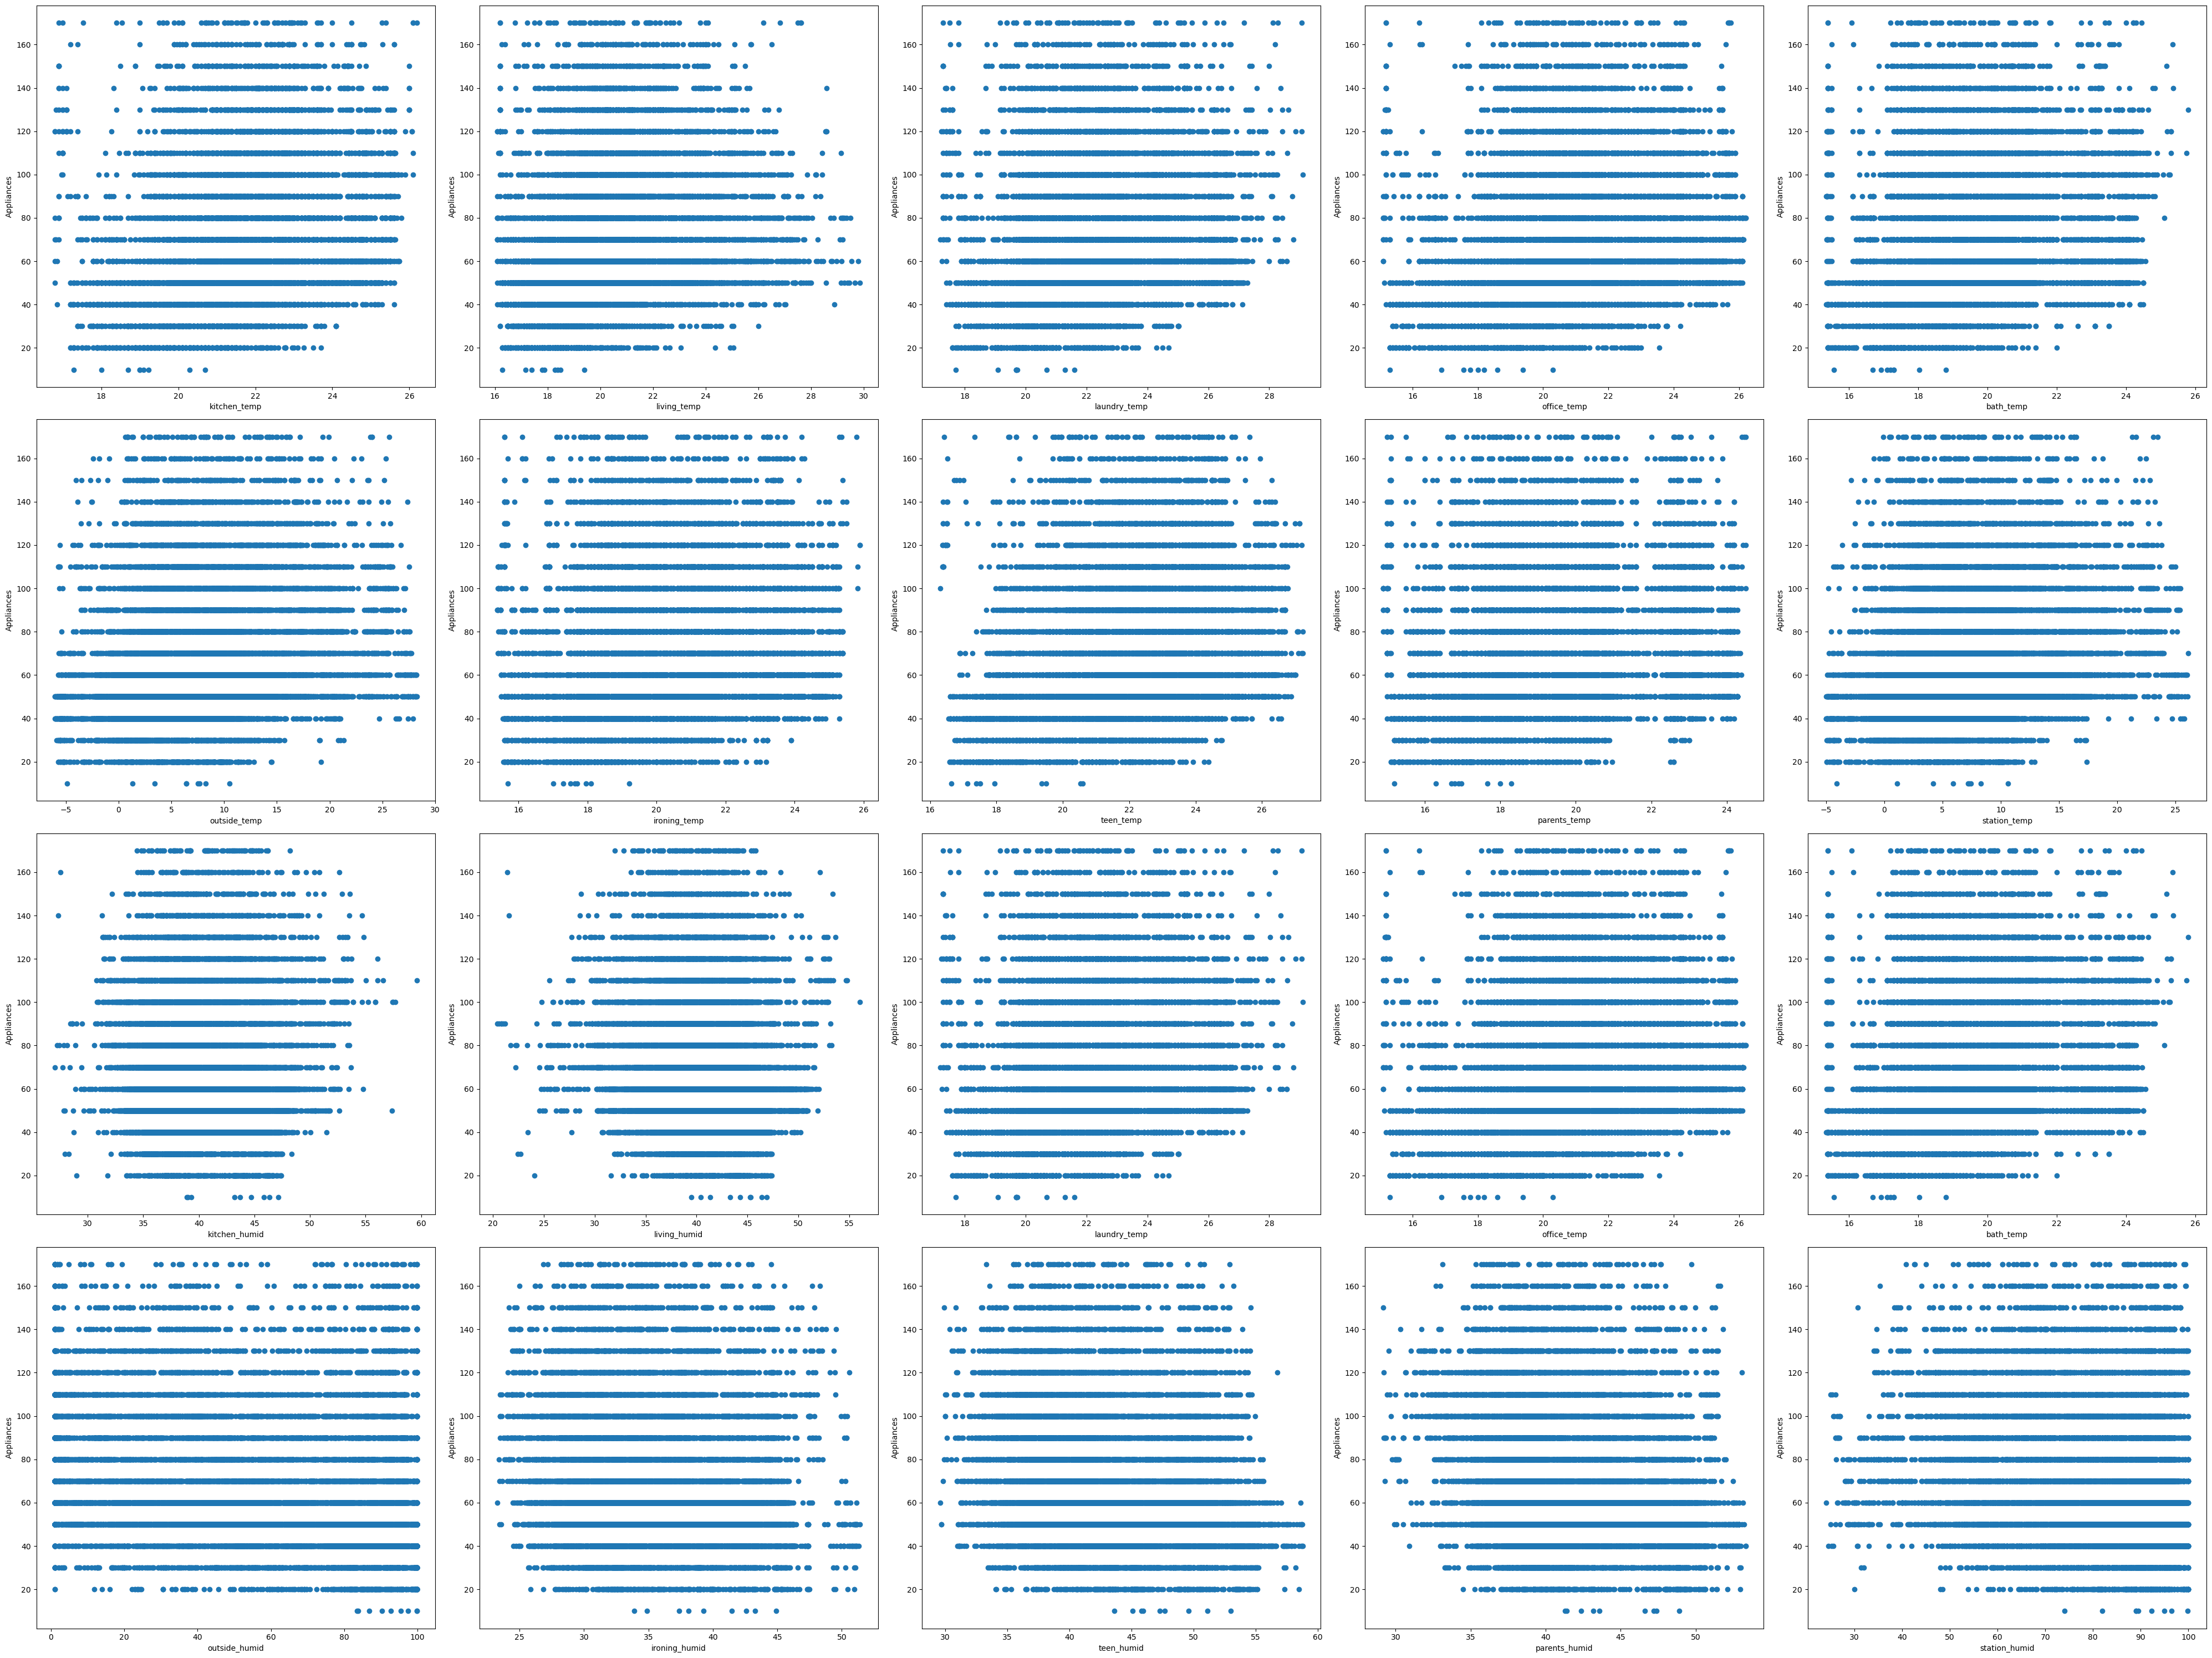

In [29]:
# let us plot the variation of energy consumption with these variables


# List of column names to create scatter plots for
cols_to_plot = ['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp', 'bath_temp',
                'outside_temp', 'ironing_temp', 'teen_temp', 'parents_temp', 'station_temp','kitchen_humid', 'living_humid', 'laundry_temp', 'office_temp', 'bath_temp',
                'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid', 'station_humid']

fig, axes = plt.subplots(4, 5, figsize=(40, 30))

for i, col in enumerate(cols_to_plot):
    ax = axes[i // 5, i % 5]
    ax.scatter(Energy[col], Energy['Appliances'])
    ax.set_xlabel(col)
    ax.set_ylabel('Appliances')

plt.tight_layout()
plt.show()

In [32]:
Energy['weekday'] = ((pd.to_datetime(Energy['date']).dt.dayofweek)// 5 == 0).astype(int)
Energy['hour'] = pd.to_datetime(Energy['date']).dt.hour
Energy['month'] = pd.to_datetime(Energy['date']).dt.month

<Axes: xlabel='hour'>

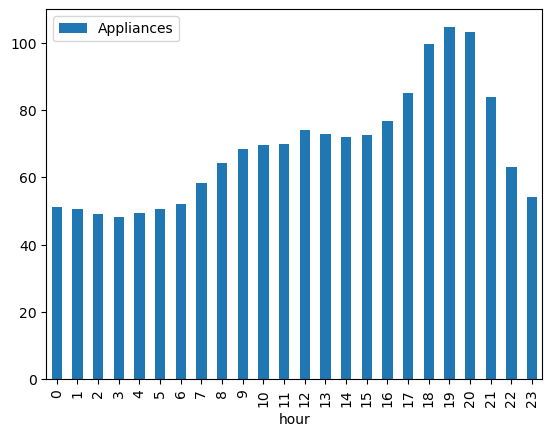

In [11]:
Energy.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar()

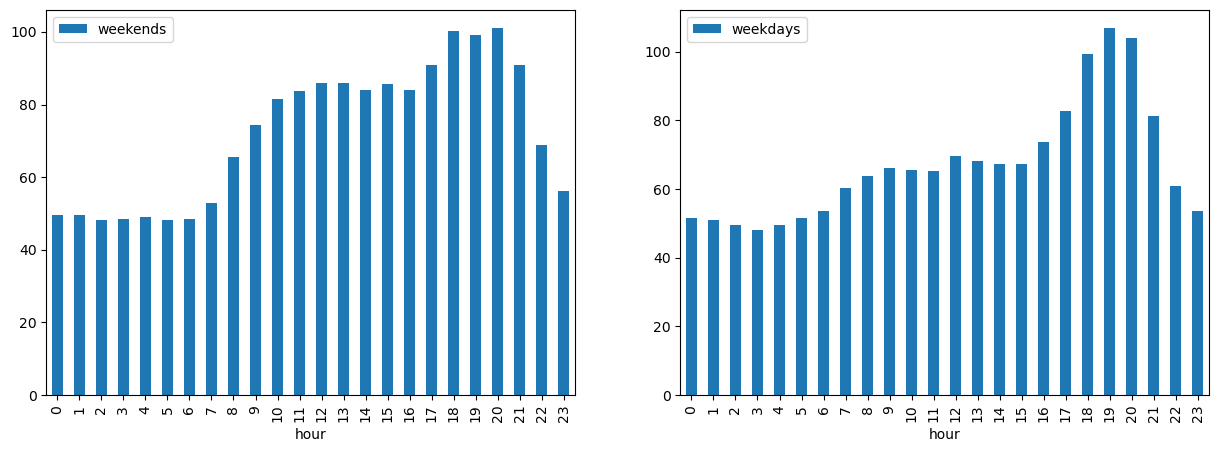

In [33]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
week_df = Energy.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

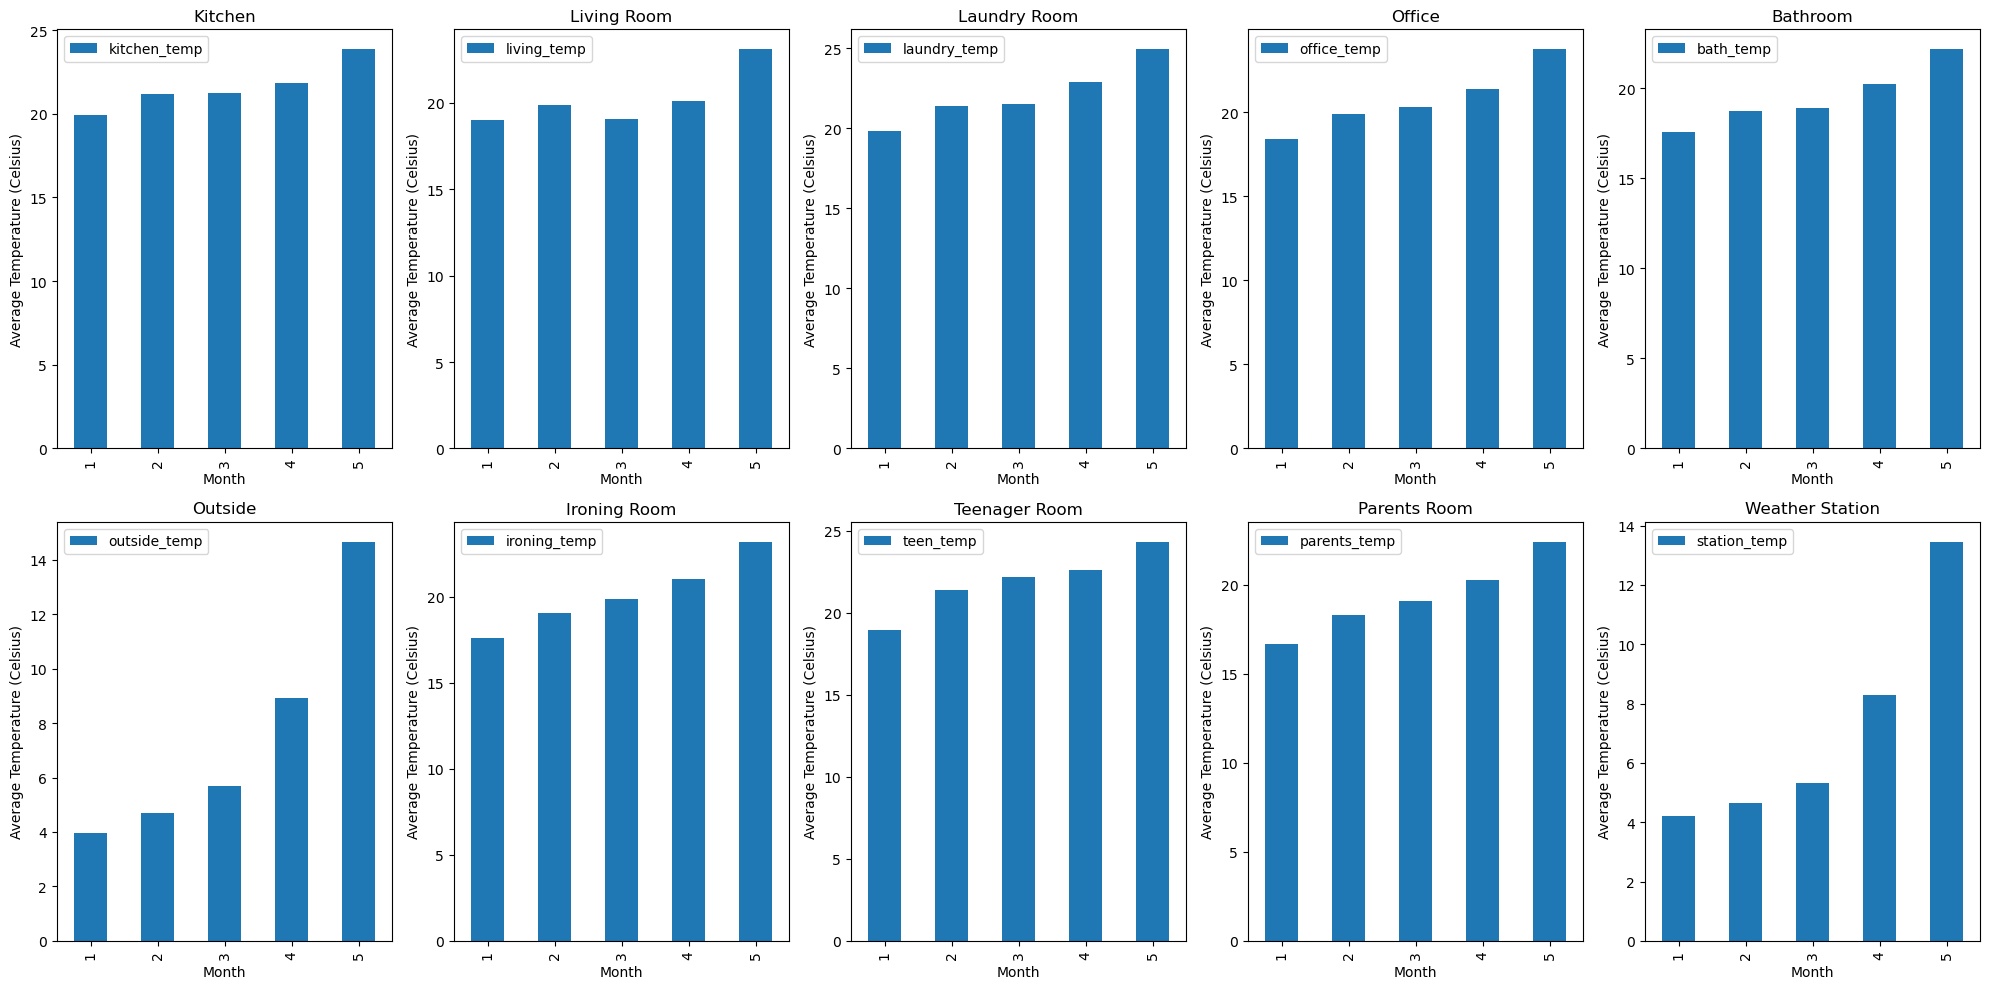

In [34]:
#this code is to check for average temperature for each month for the temperature columns
# Create a dictionary to store the temperature columns
temp_dict = {
    'kitchen_temp': 'Kitchen',
    'living_temp': 'Living Room',
    'laundry_temp': 'Laundry Room',
    'office_temp': 'Office',
    'bath_temp': 'Bathroom',
    'outside_temp': 'Outside',
    'ironing_temp': 'Ironing Room',
    'teen_temp': 'Teenager Room',
    'parents_temp': 'Parents Room',
    'station_temp': 'Weather Station'
}

# Plot the average temperature for each month for the temperature columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, (temp_col, temp_label) in enumerate(temp_dict.items()):
    Energy.groupby('month').agg({temp_col: 'mean'}).plot.bar(ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(temp_label)
    axes[i // 5, i % 5].set_xlabel('Month')
    axes[i // 5, i % 5].set_ylabel('Average Temperature (Celsius)')
    axes[i // 5, i % 5].legend(loc='best')

plt.tight_layout()
plt.show()

In [35]:
# parse datetime column 
Energy['date'] = pd.to_datetime(Energy['date']).astype('datetime64')

C:\Users\sulei\AppData\Local\Temp\ipykernel_25700\469542077.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  Energy['date'] = pd.to_datetime(Energy['date']).astype('datetime64')


In [36]:
Energy['month'] = Energy['date'].dt.month.astype(int)
Energy['day_of_month'] = Energy['date'].dt.day.astype(int)
Energy['year'] = Energy['date'].dt.year.astype(int)
Energy['hour_of_day'] = Energy['date'].dt.hour.astype(int)
Energy['day_of_week'] = Energy['date'].dt.dayofweek.astype(int)

In [37]:
Energy_date1 = pd.DataFrame({'date': Energy['date'], 'Appliances': Energy['Appliances']})
Energy_date1.date=Energy_date1.date.astype('datetime64[ns]')
Energy_date1.set_index('date', inplace=True)

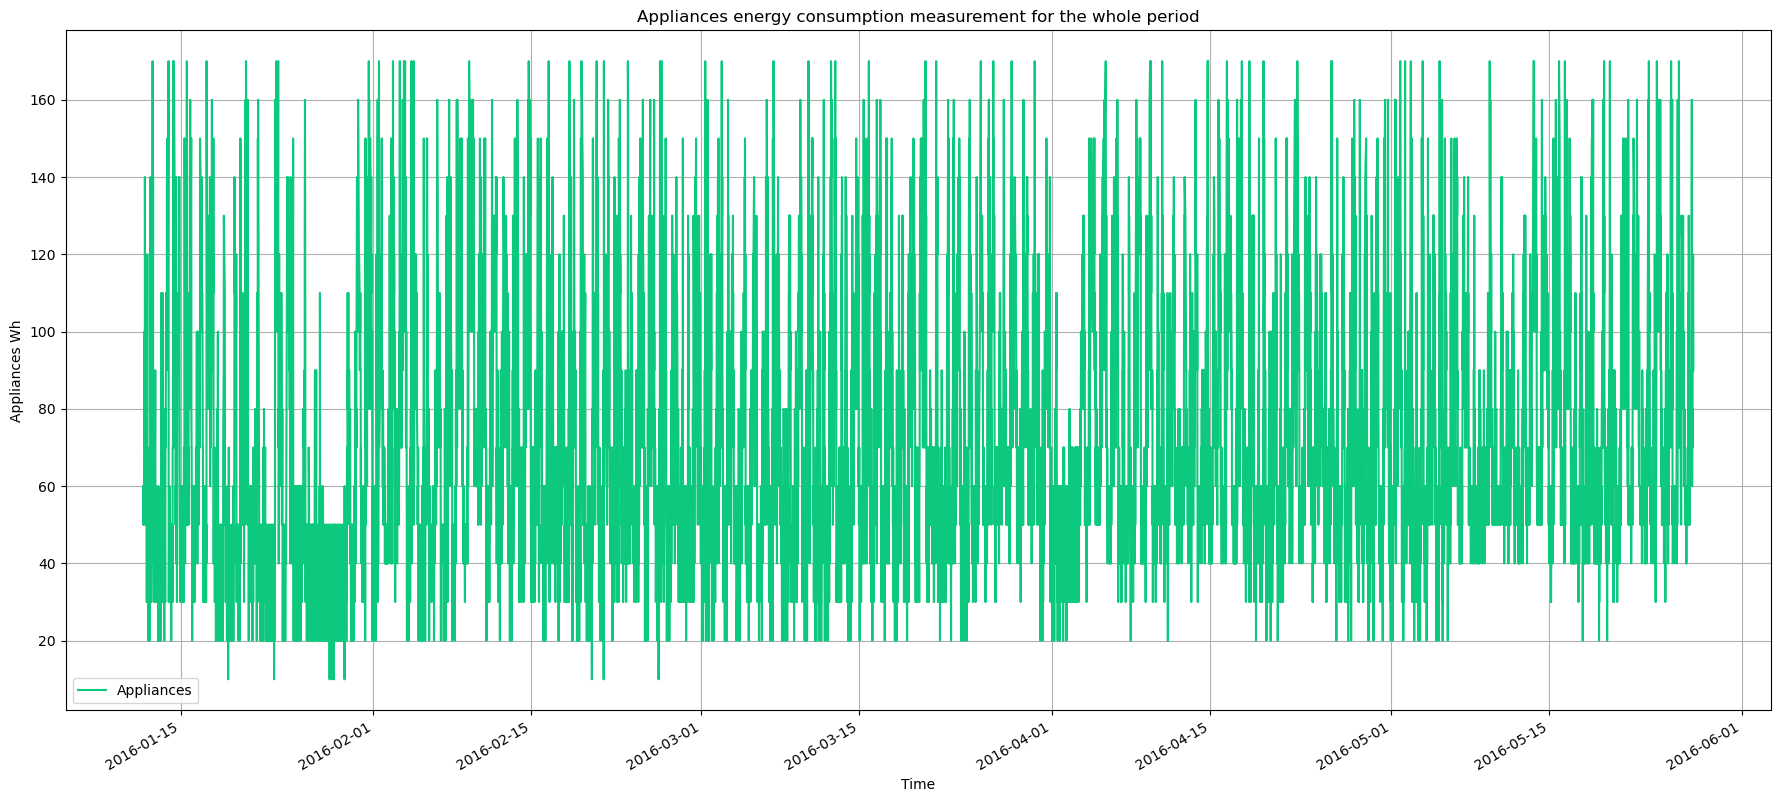

In [38]:

Energy_date1.plot(color="#0cc97d")
plt.rcParams["figure.figsize"] = (22,10)
plt.grid()
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

### INFERENTIAL STATISTICS

C:\Users\sulei\AppData\Local\Temp\ipykernel_30428\2291366060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(Energy.corr())
C:\Users\sulei\AppData\Local\Temp\ipykernel_30428\2291366060.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(Energy.corr(), annot=True, linewidths=4)


               Appliances    lights  kitchen_temp  kitchen_humid  living_temp  \
Appliances       1.000000  0.291109      0.248221       0.045596     0.264739   
lights           0.291109  1.000000      0.004010       0.092590     0.008797   
kitchen_temp     0.248221  0.004010      1.000000       0.153799     0.831967   
kitchen_humid    0.045596  0.092590      0.153799       1.000000     0.256932   
living_temp      0.264739  0.008797      0.831967       0.256932     1.000000   
living_humid    -0.109746  0.046933      0.000171       0.806895    -0.169432   
laundry_temp     0.180061 -0.077504      0.897053       0.243415     0.724341   
laundry_humid   -0.088410  0.096347     -0.032224       0.854656     0.114784   
office_temp      0.195689  0.015649      0.881085       0.096399     0.758124   
office_humid    -0.036932  0.096474      0.081965       0.890015     0.218405   
bath_temp        0.191782 -0.048351      0.887043       0.196578     0.713467   
bath_humid       0.072040  0

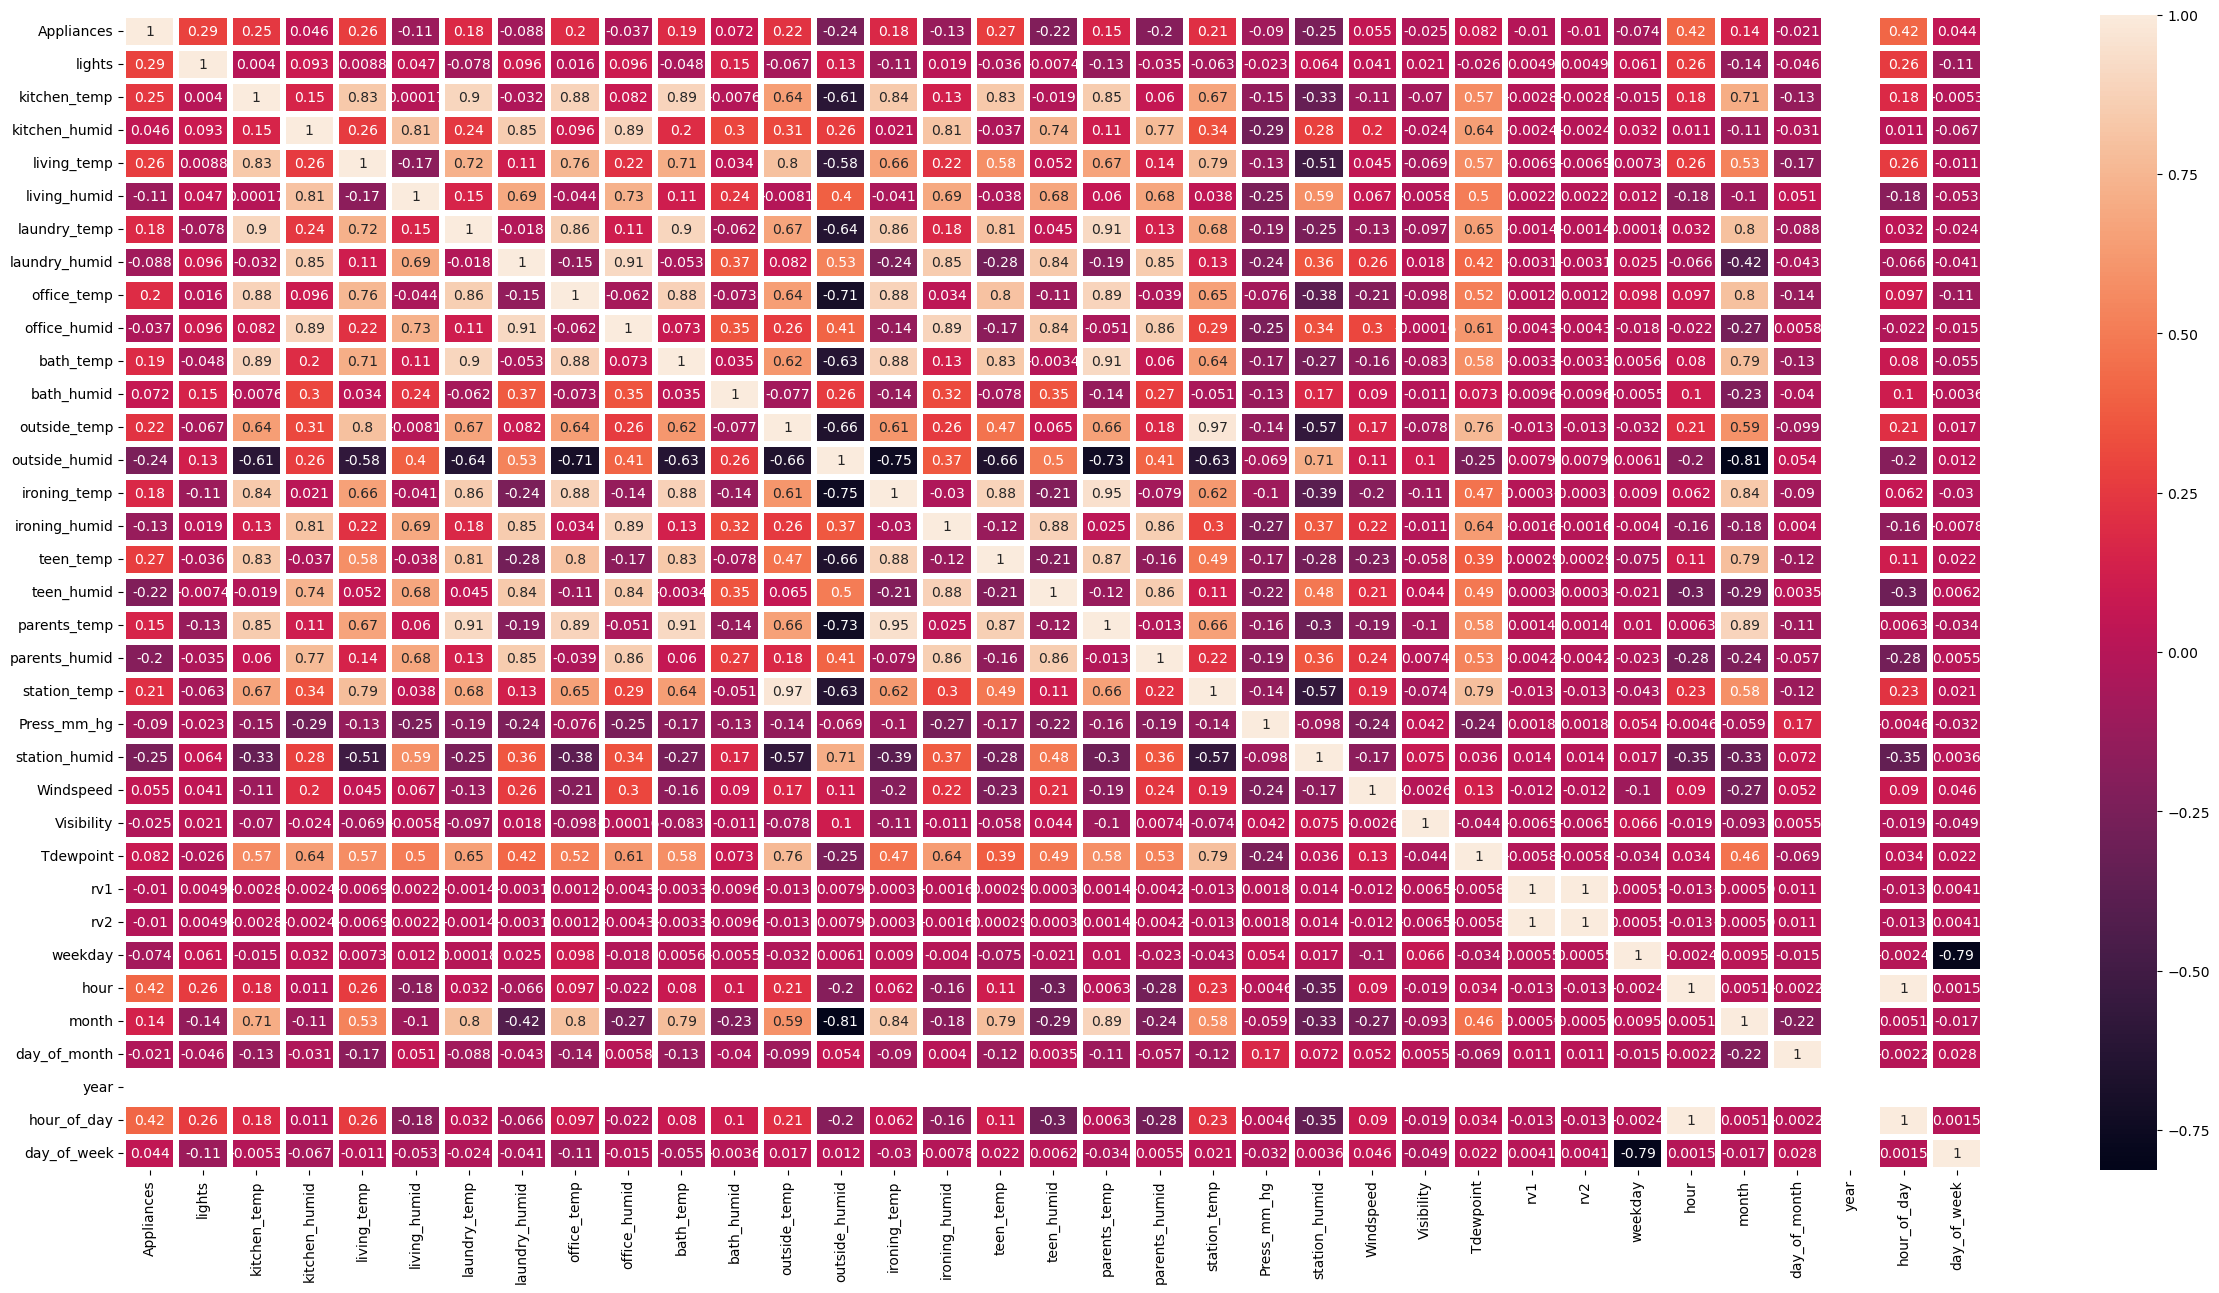

<Figure size 2200x1000 with 0 Axes>

In [38]:
#Pearson Correlation
print(Energy.corr())
plt.figure(figsize=(30,15))
# plotting correlation heatmap
dataplot = sns.heatmap(Energy.corr(), annot=True, linewidths=4)

# displaying heatmap
plt.show()
plt.savefig('Correlation_HeatMap.png', bbox_inches='tight', pad_inches=0.0)

In [39]:
#perform correlation
columnsCorrelating = []
columnsNotCorrelating = []
features = ['kitchen_temp', 'kitchen_humid','living_temp','living_humid','laundry_temp','laundry_humid','office_temp', 'office_humid',
            'bath_temp', 'bath_humid', 'outside_temp', 'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp', 'teen_humid',
            'parents_temp','parents_humid','station_temp','Press_mm_hg', 'station_humid', 'Windspeed','Visibility','Tdewpoint', 'rv1','rv2']
for c in features:
    rvalue, pvalue = pearsonr(Energy[c],Energy['Appliances'])
    print('stat=%.3f, p=%.3f' %(rvalue,pvalue))

    #confidence level is 99%, alpha = 0.01
    alpha_half = 0.005
    if pvalue > 0.005:
        print('For correlation between '+c+' and Appliances')
        print('Accept the null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is equal to 0;')
        print('(ii) both variables are independent of each other;')
        print('(iii) both variables do not have any relationship;')
        columnsNotCorrelating.append(c)
    else:
        print('For correlation between '+c+' and Appliances')
        print('Reject null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is significantly different from 0;')
        print('(ii) both variables are dependent of each other;')
        print('(iii) both variables  have a relationship;')
        columnsCorrelating.append(c)
    print("\n")

stat=0.248, p=0.000
For correlation between kitchen_temp and Appliances
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=0.046, p=0.000
For correlation between kitchen_humid and Appliances
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=0.265, p=0.000
For correlation between living_temp and Appliances
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=-0.110, p=0.000
For correlation between living_humid and Appliances
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r va

In [40]:
App_corr=[]
for i in Energy.columns[1:]:
  
  App_corr.append([i,Energy[['Appliances',i]].corr().iloc[1][0]])

App_corr=pd.DataFrame(App_corr,columns=['feature','correlation']).sort_values(['correlation'],ascending=False)
App_corr

,feature,correlation
0,Appliances,1.000000
33,hour_of_day,0.416503
29,hour,0.416503
1,lights,0.291109
16,teen_temp,0.268293
4,living_temp,0.264739
2,kitchen_temp,0.248221
12,outside_temp,0.223875
20,station_temp,0.213651
8,office_temp,0.195689


### DATA PRE-PROCESSING

In [39]:
# split dataset in features and target variable

# split dataset in features and target variable
# Features
X = Energy.drop(columns=["Appliances"])

# Target variable
y = Energy['Appliances']

#Split training dataset into independent and dependent varibales
# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns to drop based on your conclusions
columns_to_drop = ['rv1', 'rv2', 'station_temp', 'parents_temp','date', 'station_humid', 'Visibility', 'weekday', 'hour', 'month', 'day_of_month', 'year', 'hour_of_day',
       'day_of_week']

# Drop the columns from both training and testing sets
train_X.drop(columns_to_drop, axis=1, inplace=True)
test_X.drop(columns_to_drop, axis=1, inplace=True)

In [40]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import neighbors
from sklearn.svm import SVR
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'AdaBoostRegressor', 'XGBRegressor', ]  

In [41]:
train_X.columns


Index(['lights', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_humid', 'Press_mm_hg', 'Windspeed', 'Tdewpoint'],
      dtype='object')

In [42]:
models = [
            ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
            ['DecisionTreeRegressor: ', DecisionTreeRegressor()] ,
             ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [43]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    # Calculate and store R-squared for training and testing data
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    
    # Calculate and store RMSE for testing data
    rmse = sqrt(mean_squared_error(test_y, curr_model.predict(test_X)))
    curr_model_data["Test_RMSE_Score"] = rmse
    
    # Calculate and store MAE for testing data
    mae = metrics.mean_absolute_error(test_y, curr_model.predict(test_X))
    curr_model_data["Test_MAE_Score"] = mae

    model_data.append(curr_model_data)


In [46]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.030409574508666992,
  'Train_R2_Score': 0.3281594802654215,
  'Test_R2_Score': 0.31991546649658176,
  'Test_RMSE_Score': 23.873305727161817,
  'Test_MAE_Score': 17.378232627163424},
 {'Name': 'Ridge: ',
  'Train_Time': 0.014902353286743164,
  'Train_R2_Score': 0.34684518920601326,
  'Test_R2_Score': 0.33717629570247976,
  'Test_RMSE_Score': 23.568401413740393,
  'Test_MAE_Score': 16.999205743689668},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.007821321487426758,
  'Train_R2_Score': 0.7476058935137455,
  'Test_R2_Score': 0.5661266145475076,
  'Test_RMSE_Score': 19.068328095657375,
  'Test_MAE_Score': 12.60284090909091},
 {'Name': 'SVR:',
  'Train_Time': 11.57622218132019,
  'Train_R2_Score': -0.004314814398898692,
  'Test_R2_Score': -0.007634114129989156,
  'Test_RMSE_Score': 29.05912558471513,
  'Test_MAE_Score': 20.01949342139034},
 {'Name': 'RandomForest ',
  'Train_Time': 26.4159255027771,
  'Train_R2_Score': 0.9555405385917342,
  'Te

In [44]:
# Convert list to dataframe
Energy = pd.DataFrame(model_data)

In [45]:
Energy

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score,Test_MAE_Score
0,Lasso:,0.019022,0.328159,0.319915,23.873306,17.378233
1,Ridge:,0.015128,0.346845,0.337176,23.568401,16.999206
2,KNeighborsRegressor:,0.012545,0.747606,0.566127,19.068328,12.602841
3,SVR:,12.642956,-0.004315,-0.007634,29.059126,20.019493
4,RandomForest,26.348306,0.955541,0.653658,17.036633,11.184119
5,ExtraTreeRegressor :,5.677959,1.000000,0.662215,16.824845,11.004460
6,GradientBoostingClassifier:,5.480375,0.487697,0.432217,21.813347,15.395042
7,DecisionTreeRegressor:,0.268671,1.000000,0.409773,22.240294,14.093750
8,MLPRegressor:,2.237284,0.313315,0.308989,24.064314,18.303780


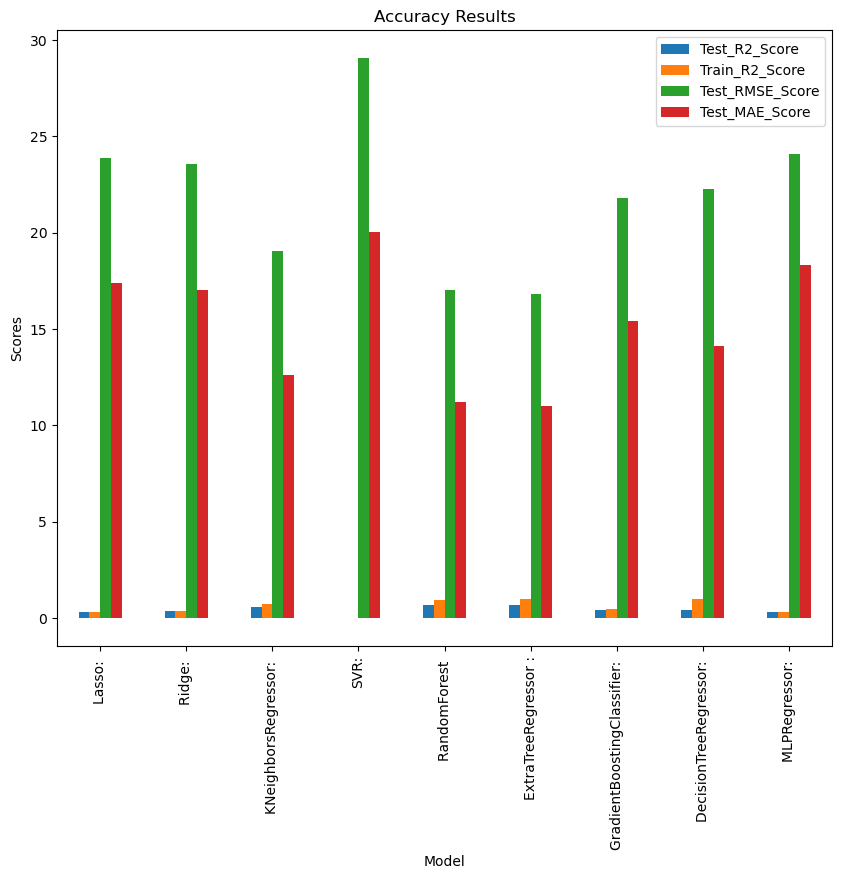

In [46]:
# Plotting
Energy.plot(x="Name", y=['Test_R2_Score', 'Train_R2_Score', 'Test_RMSE_Score', 'Test_MAE_Score'], kind="bar", title='Accuracy Results', figsize=(10, 8))
plt.xlabel("Model")
plt.ylabel("Scores")
plt.show()


In [47]:
# Print column names of train_X DataFrame
print(train_X.columns)

Index(['lights', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_humid', 'Press_mm_hg', 'Windspeed', 'Tdewpoint'],
      dtype='object')


### Hyper Parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [49]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [50]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [51]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

0.9999988225593222

In [52]:
# R2 score on test set with tuned parameters

# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.6852937037995814

In [53]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

16.23991779380348

In [57]:
from skopt import BayesSearchCV
model = RandomForestRegressor()
# Initialize the BayesianSearchCV object with the best parameters from GridSearchCV
bayes_search = BayesSearchCV(
    model,
    search_spaces={
        'n_estimators': [grid_search.best_params_['n_estimators']],
        'max_depth': [grid_search.best_params_['max_depth']],
        'max_features': ['sqrt', 'log2']  # Update options based on your requirements
    },
    n_iter=20,  # Number of iterations
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,  # Number of CPU cores to use
    verbose=1,
    scoring='neg_mean_squared_error'  # Minimize the mean squared error
)


# Fit the BayesianSearchCV object
bayes_search.fit(train_X, train_y)

# Get the best model and hyperparameters
best_model = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Evaluate the best model on the test set
test_predictions = best_model.predict(test_X)
rmse = mean_squared_error(test_y, test_predictions, squared=False)
print(f'Best Model RMSE on Test Set: {rmse}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sulei\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Model RMSE on Test Set: 16.48337800496444


### Feature Importance

Feature ranking:
1. Feature living_temp: 0.07331476618779982
2. Feature teen_humid: 0.06449509588124105
3. Feature lights: 0.061468956295209654
4. Feature parents_humid: 0.061203199661400295
5. Feature outside_humid: 0.058847799630476344
6. Feature teen_temp: 0.057918078738807506
7. Feature kitchen_humid: 0.052308977801772766
8. Feature Press_mm_hg: 0.04952085090494956
9. Feature bath_humid: 0.049331960942588966
10. Feature outside_temp: 0.04603339375794282
11. Feature ironing_humid: 0.04451861627351534
12. Feature kitchen_temp: 0.04207637737407746
13. Feature office_temp: 0.040586816935751106
14. Feature laundry_humid: 0.03961495890305602
15. Feature bath_temp: 0.03933399087125271
16. Feature office_humid: 0.039320368147321295
17. Feature laundry_temp: 0.03901481020477616
18. Feature Tdewpoint: 0.037293738973396974
19. Feature ironing_temp: 0.03690017597671423
20. Feature living_humid: 0.036134539319303285
21. Feature Windspeed: 0.030762527218646717


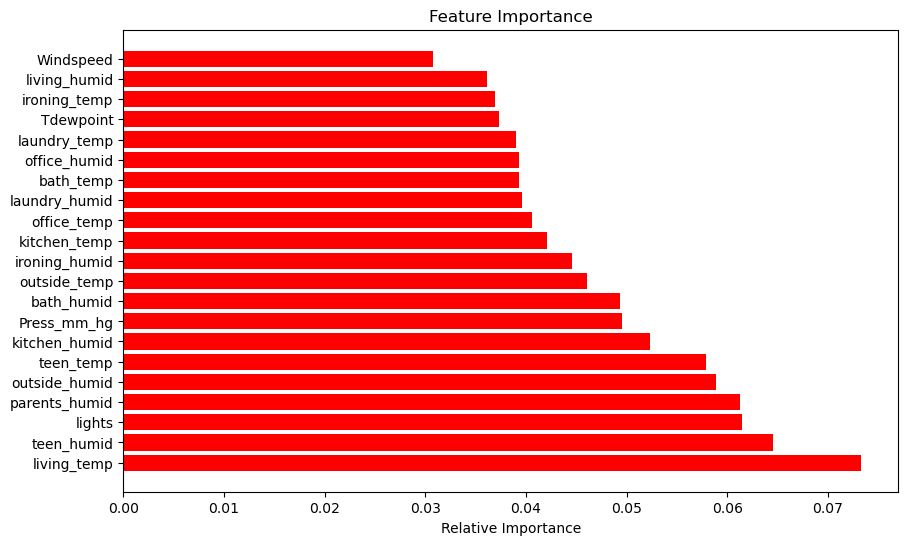

In [58]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Get feature names from train_X.columns
features = train_X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(len(features)):
    print(f"{f + 1}. Feature {features[indices[f]]}: {feature_importances[indices[f]]}")
# Create a horizontal bar chart to visualize feature importances


plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

# Show the chart
plt.show()

In [60]:
# Get top 5 most important feature 
names = [train_X.columns[i] for i in indices]
names[0:5]

['living_temp', 'teen_humid', 'lights', 'parents_humid', 'outside_humid']

In [61]:
# Get 5 least important feature 
names[-5:]

['laundry_temp', 'Tdewpoint', 'ironing_temp', 'living_humid', 'Windspeed']

In [62]:
# Reduce test & training set to 5 feature set
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [63]:
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [64]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))
print('Testing set MAE Score - ', metrics.mean_absolute_error(test_y, cloned_model.predict(test_important_feature)))


Training set R2 Score -  0.9998335066868789
Testing set R2 Score -  0.5844821523329872
Testing set RMSE Score -  18.660614967897015
Testing set MAE Score -  12.534877646663963
